1. Importamos las librerias necesarias

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1.1 Cargamos el csv

In [70]:
df_cafe= pd.read_csv("./src/Coffee_domestic_consumption.csv")

In [71]:
df_cafe.head()

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,Bolivia (Plurinational State of),Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,...,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000
2,Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
3,Burundi,Arabica/Robusta,120000,96000,102000,114600,120000,120000,120000,120000,...,120000,120000,120000,120000,120000,120000,120000,120000,120000,3412020
4,Ecuador,Arabica/Robusta,21000000,21000000,21000000,21000000,21000000,21000000,18000000,18000000,...,9000000,9000000,9300000,9300000,9300000,9300000,9300000,9300000,8940000,381540000


In [72]:
df_cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country                     55 non-null     object
 1   Coffee type                 55 non-null     object
 2   1990/91                     55 non-null     int64 
 3   1991/92                     55 non-null     int64 
 4   1992/93                     55 non-null     int64 
 5   1993/94                     55 non-null     int64 
 6   1994/95                     55 non-null     int64 
 7   1995/96                     55 non-null     int64 
 8   1996/97                     55 non-null     int64 
 9   1997/98                     55 non-null     int64 
 10  1998/99                     55 non-null     int64 
 11  1999/00                     55 non-null     int64 
 12  2000/01                     55 non-null     int64 
 13  2001/02                     55 non-null     int64 
 

In [ ]:
import pandas as pd


# 2. Definir las variables a mantener (id_vars) y las variables a derretir (value_vars)
id_vars = ['Country', 'Coffee type']

# Identificamos las columnas de valor (los años) excluyendo las id_vars y la columna Total
# Usamos .filter() para seleccionar solo las columnas con el formato 'XXXX/YY'
year_columns = [col for col in df_cafe.columns if '/' in col and col != 'Total_domestic_consumption']

# 3. Aplicar la función melt (Pivoteo)
df_long = pd.melt(
    df_cafe,
    id_vars=id_vars,
    value_vars=year_columns,
    var_name='Year_Period',  # El periodo fiscal (ej. '1990/91')
    value_name='Domestic_Consumption' # El valor del consumo
)

# 4. Limpieza y Normalización de la Columna Temporal

# Extraemos solo el año de inicio (ej. '1990' de '1990/91')
df_long['Year'] = df_long['Year_Period'].str.split('/').str[0].astype(int)

# Eliminamos la columna Year_Period ya que Year es más útil para el merge
df_long = df_long.drop(columns=['Year_Period'])

# Guardamos el DataFrame en formato largo
df_long.to_csv('Coffee_domestic_consumption_long.csv', index=False)

print("--- DataFrame en Formato Largo (Primeras filas) ---")
df_long.head()

# 5. Volver a analizar la distribución de la variable principal
print("\n--- Estadísticas Descriptivas de Domestic_Consumption (Formato Largo) ---")
df_long['Domestic_Consumption'].describe()

--- DataFrame en Formato Largo (Primeras filas) ---

--- Estadísticas Descriptivas de Domestic_Consumption (Formato Largo) ---


count    1.650000e+03
mean     3.708289e+07
std      1.331194e+08
min      0.000000e+00
25%      2.400000e+05
50%      3.330000e+06
75%      1.950000e+07
max      1.332000e+09
Name: Domestic_Consumption, dtype: float64

In [74]:
print("\n--- Info del DataFrame en Formato Largo ---")
df_long.info()


--- Info del DataFrame en Formato Largo ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               1650 non-null   object
 1   Coffee type           1650 non-null   object
 2   Domestic_Consumption  1650 non-null   int64 
 3   Year                  1650 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 51.7+ KB


In [75]:
# 5. Volver a analizar la distribución de la variable principal
print("\n--- Estadísticas Descriptivas de Domestic_Consumption (Formato Largo) ---")
df_long['Domestic_Consumption'].describe()


--- Estadísticas Descriptivas de Domestic_Consumption (Formato Largo) ---


count    1.650000e+03
mean     3.708289e+07
std      1.331194e+08
min      0.000000e+00
25%      2.400000e+05
50%      3.330000e+06
75%      1.950000e+07
max      1.332000e+09
Name: Domestic_Consumption, dtype: float64

In [76]:
# Identificación de los 10 principales consumidores
top_10_consumption = df_long.sort_values(
    by='Domestic_Consumption',
    ascending=False
).head(10)

print("\n--- Top 10 Países por Consumo Doméstico (Outliers) ---")
print(top_10_consumption[['Year', 'Country', 'Domestic_Consumption']])

# Guardar los datos para que el usuario pueda verlos
top_10_consumption[['Year', 'Country', 'Domestic_Consumption']].to_csv('top_10_consumption.csv', index=False)


--- Top 10 Países por Consumo Doméstico (Outliers) ---
      Year Country  Domestic_Consumption
1542  2018  Brazil            1332000000
1597  2019  Brazil            1320000000
1487  2017  Brazil            1319820000
1432  2016  Brazil            1273500000
1377  2015  Brazil            1230480000
1322  2014  Brazil            1219980000
1212  2012  Brazil            1219800000
1267  2013  Brazil            1205100000
1157  2011  Brazil            1183200000
1102  2010  Brazil            1147920000


In [77]:
import seaborn as sns

top_5_countries = df_long.groupby('Country')['Domestic_Consumption'].sum().nlargest(5).index.tolist()

# 2. Filtrar el DataFrame para incluir solo estos top 5
df_top_5 = df_long[df_long['Country'].isin(top_5_countries)]

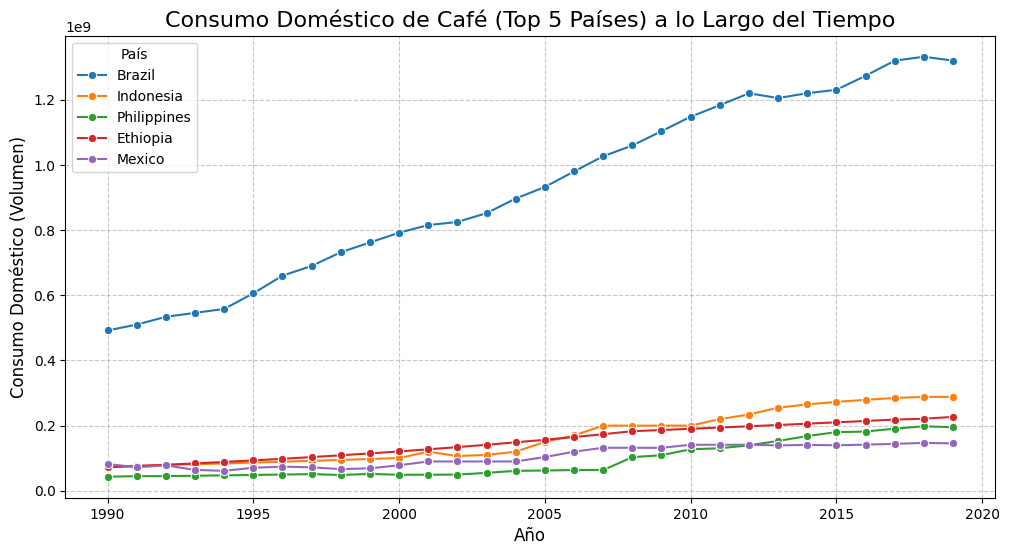

In [78]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_top_5,
    x='Year',
    y='Domestic_Consumption',
    hue='Country',
    marker='o' # Añadimos marcadores para ver los puntos de dato
)
plt.title('Consumo Doméstico de Café (Top 5 Países) a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Consumo Doméstico (Volumen)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='País')
plt.show()

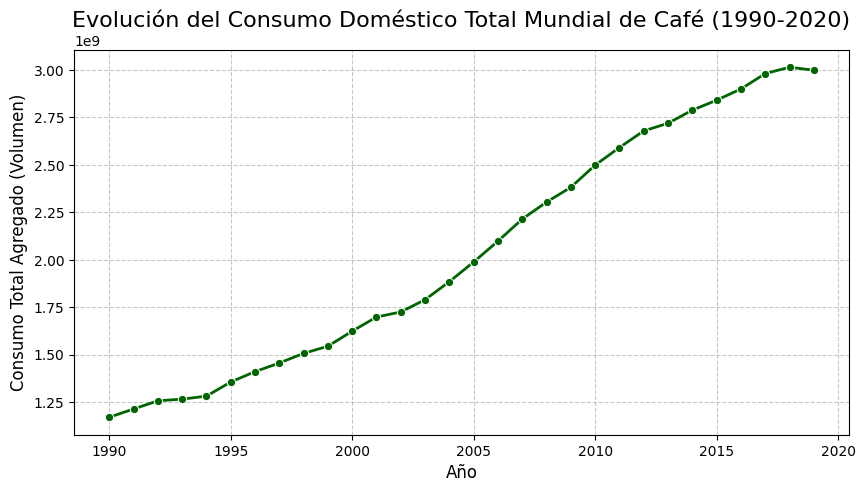

In [79]:
# 1. Agrupar por año para obtener el consumo total en cada periodo
df_total_annual = df_long.groupby('Year')['Domestic_Consumption'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=df_total_annual,
    x='Year',
    y='Domestic_Consumption',
    marker='o',
    color='darkgreen',
    linewidth=2
)
plt.title('Evolución del Consumo Doméstico Total Mundial de Café (1990-2020)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Consumo Total Agregado (Volumen)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [80]:
# 1. Identificar el Consumo Inicial (1990) y Final (2019)
# Usaremos las columnas de año que creaste en el paso de Pivoteo.
year_start = 1990
year_end = 2019
N = year_end - year_start  # Número de periodos de crecimiento

# 2. Obtener los valores del año inicial y final
df_cagr = df_long[df_long['Year'].isin([year_start, year_end])].copy()

# 3. Pivoteo para tener los valores iniciales y finales en columnas separadas
df_cagr_pivot = df_cagr.pivot_table(
    index='Country',
    columns='Year',
    values='Domestic_Consumption'
).reset_index()

# Renombrar las columnas para mayor claridad
df_cagr_pivot.columns.name = None # Eliminar el nombre de la columna 'Year' del índice
df_cagr_pivot = df_cagr_pivot.rename(columns={
    year_start: 'Start_Value',
    year_end: 'End_Value'
})

print("--- Primeras Filas del DataFrame para Cálculo CAGR ---")
print(df_cagr_pivot.head())

--- Primeras Filas del DataFrame para Cálculo CAGR ---
                            Country  Start_Value     End_Value
0                            Angola    1200000.0  1.800000e+06
1  Bolivia (Plurinational State of)    1500000.0  3.660000e+06
2                            Brazil  492000000.0  1.320000e+09
3                           Burundi     120000.0  1.200000e+05
4                          Cameroon    4998000.0  4.620000e+06


In [81]:
# 4. Manejar Start_Value == 0 para evitar errores de división o resultados infinitos
# Usaremos un epsilon (un número muy pequeño) o simplemente estableceremos NaN,
# pero en este caso, es más robusto asignar NaN.
df_cagr_pivot.loc[df_cagr_pivot['Start_Value'] == 0, 'Start_Value'] = 1 # Pequeña imputación para permitir el cálculo

# 5. Aplicar la fórmula de la CAGR
df_cagr_pivot['CAGR'] = (
    (df_cagr_pivot['End_Value'] / df_cagr_pivot['Start_Value']) ** (1/N)
) - 1

# Convertir la CAGR a porcentaje y ordenar
df_cagr_pivot['CAGR_%'] = df_cagr_pivot['CAGR'] * 100
df_cagr_ranked = df_cagr_pivot.sort_values(by='CAGR_%', ascending=False)

# Mostrar el ranking de los 10 países con mayor crecimiento
print("\n--- Top 10 Países con Mayor Tasa de Crecimiento Anual Compuesta (CAGR) ---")
print(df_cagr_ranked[['Country', 'CAGR_%', 'Start_Value', 'End_Value']].head(10))


--- Top 10 Países con Mayor Tasa de Crecimiento Anual Compuesta (CAGR) ---
                             Country     CAGR_%  Start_Value    End_Value
28  Lao People's Democratic Republic  73.974066          1.0    9420000.0
52                             Yemen  68.673130          1.0    3840000.0
21                            Guyana  57.640844          1.0     540000.0
46                       Timor-Leste  42.587332          1.0      29400.0
44                          Tanzania  11.541550     240000.0    5700000.0
51                          Viet Nam  10.409217    9000000.0  159000000.0
45                          Thailand   7.168694   11280000.0   84000000.0
10                     Côte d'Ivoire   6.575714    3000000.0   19020000.0
34                         Nicaragua   6.479722    2040000.0   12600000.0
40                       Philippines   5.334520   43200000.0  195000000.0


C:\Users\diana\AppData\Local\Temp\ipykernel_14764\1130267178.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


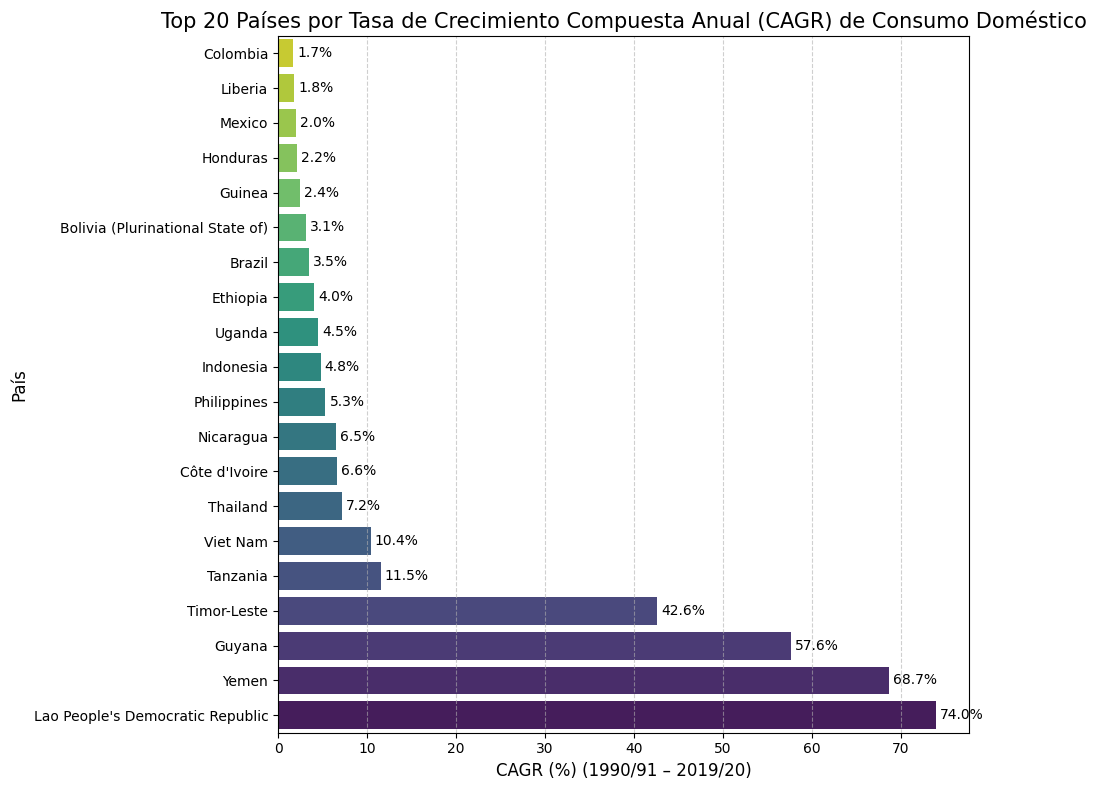

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Usamos los 20 países con mayor crecimiento relativo
df_top_20_cagr = df_cagr_ranked.head(20)

plt.figure(figsize=(10, 8))

# 1. Crear el gráfico de barras horizontal
ax = sns.barplot(
    x='CAGR_%',
    y='Country',
    data=df_top_20_cagr,
    palette='viridis'
)

# 2. Iterar sobre las barras y añadir las etiquetas (Etiquetas de Datos)
for container in ax.containers:
    # Esta parte itera sobre cada barra individualmente
    labels = [f'{v.get_width():.1f}%' for v in container] # Formatea el valor de la barra como 'X.X%'
    ax.bar_label(
        container,
        labels=labels,
        label_type='edge', # Coloca la etiqueta en el borde exterior de la barra
        padding=3,         # Espacio entre la barra y la etiqueta
        fontsize=10,
        color='black'
    )

# 3. Formato del Eje X (Asegurar que sea legible)
ax.set_title('Top 20 Países por Tasa de Crecimiento Compuesta Anual (CAGR) de Consumo Doméstico', fontsize=15)
ax.set_xlabel('CAGR (%) (1990/91 – 2019/20)', fontsize=12)
ax.set_ylabel('País', fontsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.6)
ax.invert_yaxis() # Países de mayor crecimiento en la parte superior
plt.tight_layout() # Ajustar el layout para evitar cortes de etiquetas
plt.show();

El **CAGR**(Tasa de Crecimiento Anual Compuesta) nos indica la velcidad relativa de expansión del mercado en cada país. Esta medida a diferencia del crecimiento promedio simple ignora situaciones extremas como por ejemplo una sequia o crisis económica.

**- CAGR Alta:** suelen ser países con mercados emergentes( gran oportunidad de crecimiento)

**- CAGR Baja:** Paises con mercados maduros ( se necesita much ainversión para un crecimiento futuro)

In [83]:
import numpy as np

# 1. Calcular la Tasa de Crecimiento Anual (YoY)
# Usamos groupby y pct_change() para calcular el crecimiento interanual por país.
df_long['YoY_Growth'] = df_long.groupby('Country')['Domestic_Consumption'].pct_change()

# La primera fila de cada grupo (Country) será NaN, lo cual es correcto.
print("--- Tasa de Crecimiento Interanual (Primeras Filas) ---")
print(df_long[['Country', 'Year', 'Domestic_Consumption', 'YoY_Growth']].head(5))

# Manejo de valores extremos/infinitos:
# La tasa YoY es infinita si el valor inicial (el año anterior) es cero.
# Para el cálculo del promedio, es mejor establecer estos valores extremos a NaN o a un límite
# razonable, o simplemente ignorarlos en la media. Aquí, simplemente los ignoraremos en el .mean()

--- Tasa de Crecimiento Interanual (Primeras Filas) ---
                            Country  Year  Domestic_Consumption  YoY_Growth
0                            Angola  1990               1200000         NaN
1  Bolivia (Plurinational State of)  1990               1500000         NaN
2                            Brazil  1990             492000000         NaN
3                           Burundi  1990                120000         NaN
4                           Ecuador  1990              21000000         NaN


In [84]:
# 2. Calcular la Media Aritmética de las tasas interanuales (AAGR)
df_aagr = df_long.groupby('Country')['YoY_Growth'].mean().reset_index()
df_aagr = df_aagr.rename(columns={'YoY_Growth': 'AAGR'})

# 3. Convertir a porcentaje y rankear
df_aagr['AAGR_%'] = df_aagr['AAGR'] * 100
df_aagr_ranked = df_aagr.sort_values(by='AAGR_%', ascending=False)

print("\n--- Top 10 Países por Crecimiento Promedio Simple (AAGR) ---")
print(df_aagr_ranked[['Country', 'AAGR_%']].head(10))


--- Top 10 Países por Crecimiento Promedio Simple (AAGR) ---
                             Country     AAGR_%
21                            Guyana        inf
46                       Timor-Leste        inf
52                             Yemen        inf
28  Lao People's Democratic Republic        inf
44                          Tanzania  22.072409
10                     Côte d'Ivoire  18.394454
34                         Nicaragua  13.768850
51                          Viet Nam  10.822475
41                            Rwanda   9.779895
45                          Thailand   7.836579


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- 1. Preparación de Datos: Selección de Países Estratégica ---
# ⚠️ IMPORTANTE: Ajusta los nombres 'Brazil' y 'Mexico' si en tu limpieza
# los convertiste a minúsculas ('brasil', 'mexico').
required_countries = ['Brazil', 'Mexico'] 
N_top_diff = 8 # Número de países adicionales a seleccionar por mayor diferencia

# 1.1. Obtener la lista de países que tienen la mayor diferencia (excluyendo los requeridos)
top_diff_countries = df_comparison[~df_comparison['Country'].isin(required_countries)].sort_values(
    by='Difference', 
    ascending=False
).head(N_top_diff)['Country'].tolist()

# 1.2. Combinar las listas (los 8 con mayor diferencia + Brasil y México)
countries_to_plot = required_countries + top_diff_countries

# 1.3. Filtrar y preparar el DataFrame para el gráfico
df_plot_filtered = df_comparison[df_comparison['Country'].isin(countries_to_plot)]

# 1.4. Ordenar el DataFrame para una presentación lógica (ej. por CAGR descendente)
df_plot = df_plot_filtered.sort_values(by='CAGR_%', ascending=False).set_index('Country')[['CAGR_%', 'AAGR_%']]


# --- 2. Creación del Gráfico de Barras Agrupadas (Ajustado) ---
fig, ax = plt.subplots(figsize=(12, 7)) # Tamaño estándar

# Plotear las barras con el eje 'ax'
df_plot.plot(
    kind='bar',
    ax=ax,
    rot=0, 
    width=0.8
)

# --- 3. Ajuste Crítico de las Etiquetas de País (Solución al Solapamiento) ---
# Aplicamos una rotación a las etiquetas del eje X (países)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# 4. Ajustar el espacio inferior del gráfico para acomodar las etiquetas rotadas
plt.subplots_adjust(bottom=0.2) 


# --- 5. Re-aplicar Etiquetas de Datos (Porcentajes) ---
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        width = bar.get_width()
        x_pos = bar.get_x()
        
        label_text = f'{height:.1f}%'
        
        # Ajustamos la posición Y para que la etiqueta esté ligeramente por encima
        y_text = height + ax.get_ylim()[1] * 0.005 
        x_text = x_pos + width / 2 
        
        ax.text(
            x_text, 
            y_text, 
            label_text, 
            ha='center', 
            va='bottom', 
            fontsize=9,
            color='black'
        )

# --- 6. Formato Final del Gráfico ---
ax.set_title('Comparación: CAGR vs. AAGR (Top Crecimiento + Casos Clave)', fontsize=15)
ax.set_ylabel('Tasa de Crecimiento (%)', fontsize=12)
ax.set_xlabel('País', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Método')
plt.tight_layout(rect=[0, 0.15, 1, 1])
plt.show();

NameError: name 'df_comparison' is not defined